Загрузка необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

EDA

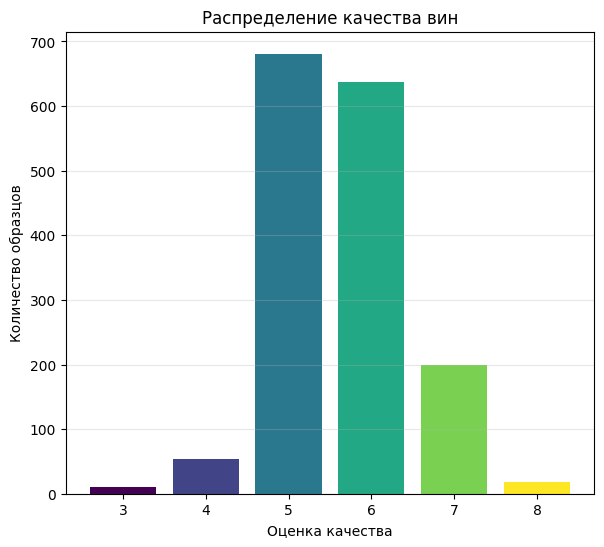

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
quality_dist = df['quality'].value_counts().sort_index()
bars = plt.bar(quality_dist.index, quality_dist.values,
               color=plt.cm.viridis(np.linspace(0, 1, len(quality_dist))))
plt.title('Распределение качества вин')
plt.xlabel('Оценка качества')
plt.ylabel('Количество образцов')
plt.grid(axis='y', alpha=0.3)


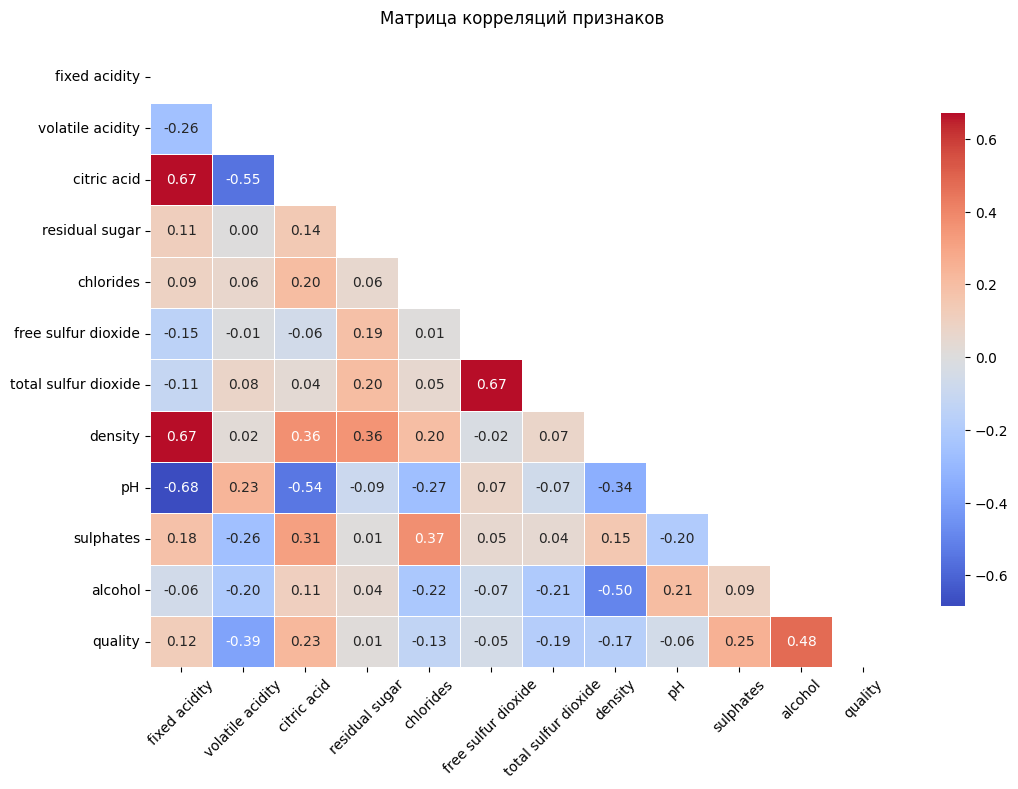

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций признаков', pad=20)
plt.xticks(rotation=45)
plt.show()

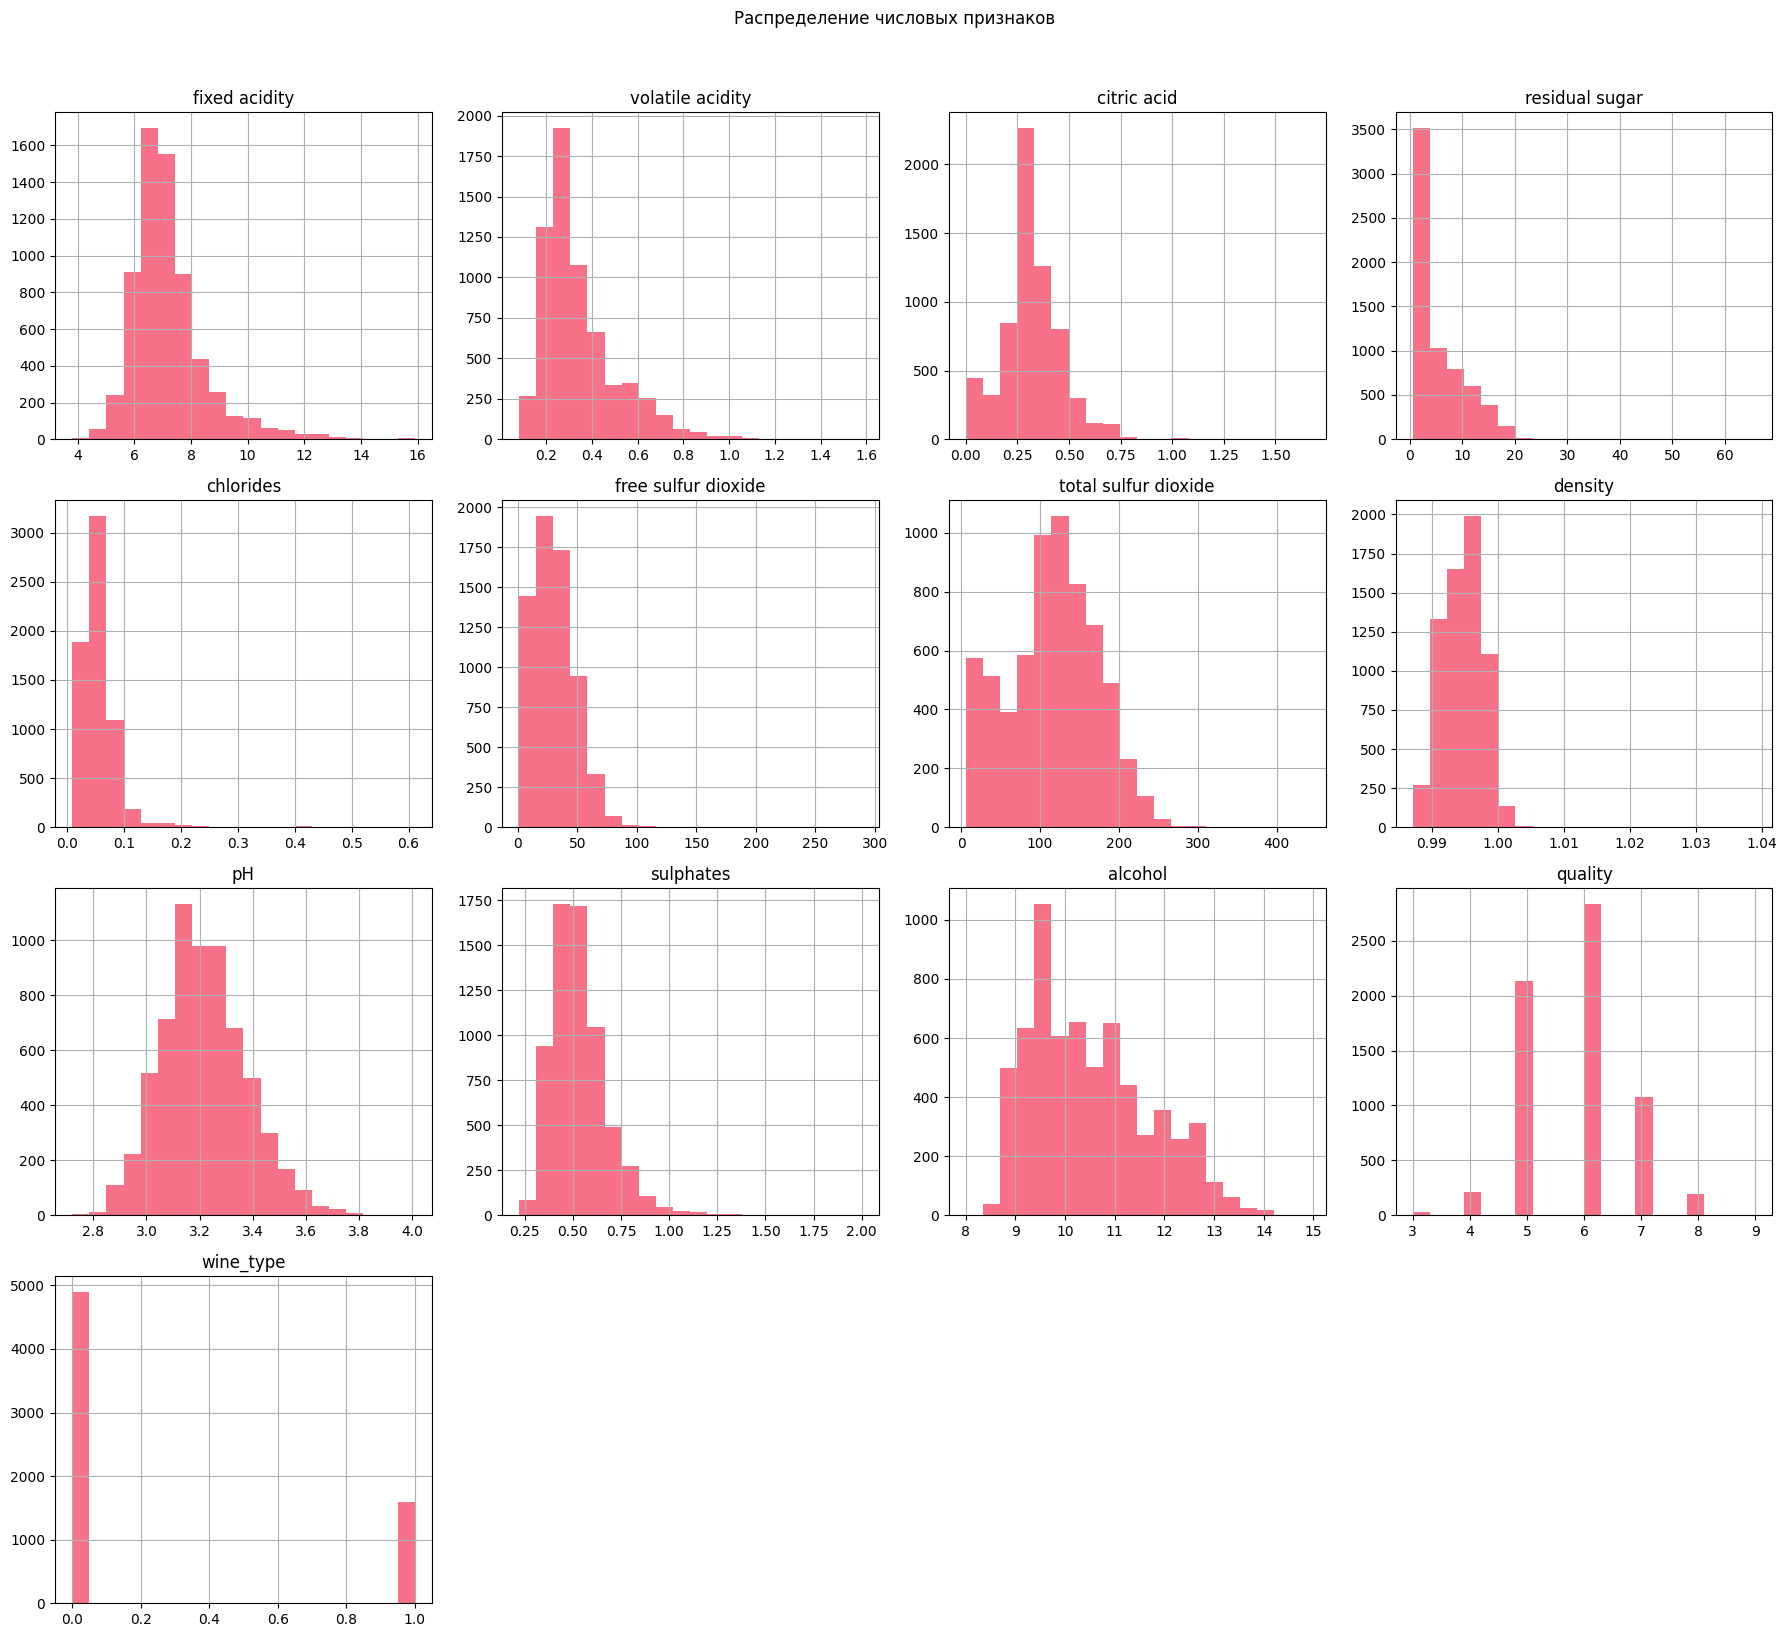

In [57]:
num_cols = df.select_dtypes(include=np.number).columns
n_cols = len(num_cols)
n_rows = (n_cols // 4) + (1 if n_cols % 4 else 0)
layout = (n_rows, 4) if n_rows > 1 else (1, n_cols)
df[num_cols].hist(bins=20, layout=layout, figsize=(18, 4*n_rows))
plt.suptitle('Распределение числовых признаков', y=1.02)
plt.tight_layout()
plt.show()

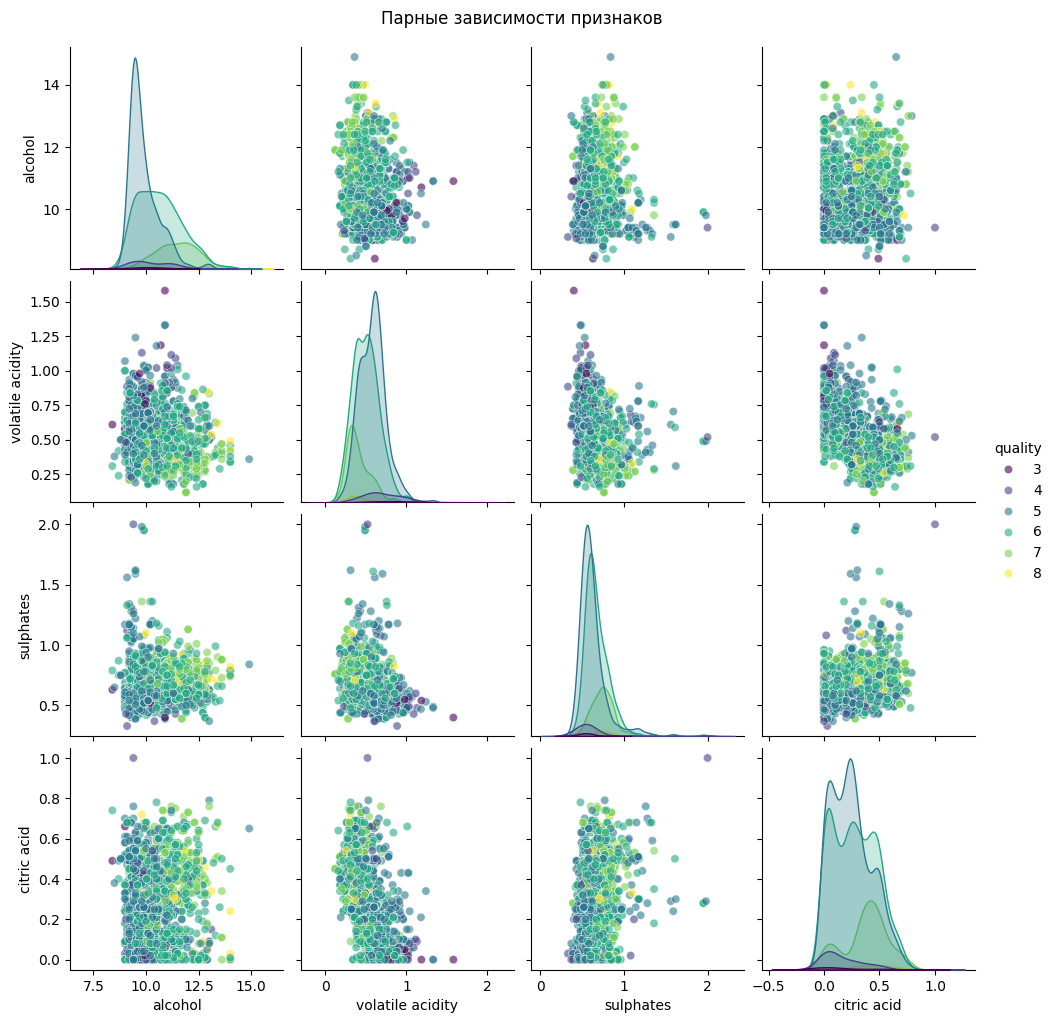

In [ ]:
sns.pairplot(df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']],
             hue='quality', palette='viridis', plot_kws={'alpha': 0.6})
plt.suptitle('Парные зависимости признаков', y=1.02)
plt.show()

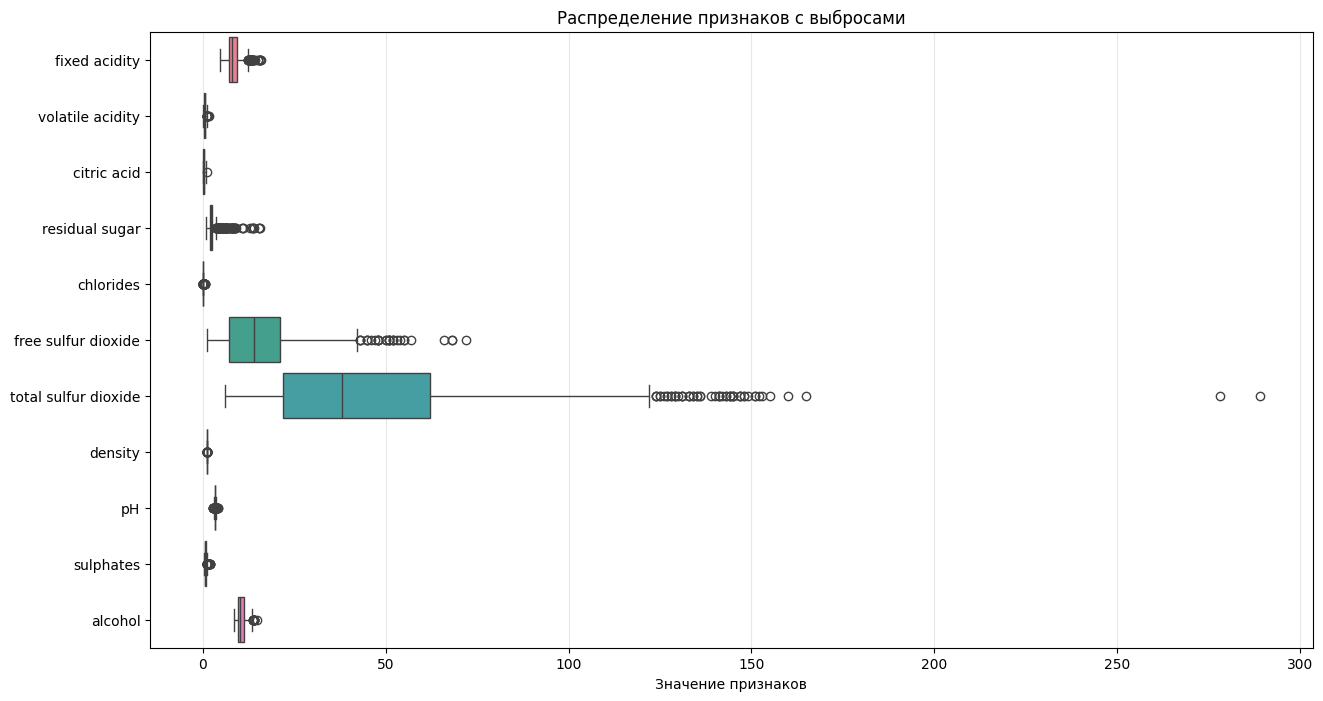

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop('quality', axis=1), orient='h')
plt.title('Распределение признаков с выбросами')
plt.xlabel('Значение признаков')
plt.grid(axis='x', alpha=0.3)
plt.show()

Пометим редкие классы

In [ ]:
y_rare = y.apply(lambda x: 1 if x in [3,4,8,9] else 0)

Обучение модели

In [ ]:
X_train, X_test, y_train, y_test, y_rare_train, y_rare_test = train_test_split(
    X, y, y_rare,
    test_size=0.2,
    random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # 2 слоя: 128 и 64 нейрона
    activation='relu',             # ReLU активация
    solver='adam',                # Оптимизатор Adam (градиентный спуск)
    learning_rate_init=0.0003,    # Скорость обучения
    max_iter=300,                 # Эпохи
    early_stopping=True,          # Ранняя остановка
    validation_fraction=0.2,
    random_state=42
)

In [ ]:
model.fit(X_train_scaled, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(128, 64),
             learning_rate_init=0.0003, max_iter=300, random_state=42,
             validation_fraction=0.2)

In [ ]:
y_test_pred = model.predict(X_test_scaled)

коррекция предсказаний для редких классов качества вин

In [ ]:
rare_classes = [3,4,8,9]
for i in range(len(y_test_pred)):
    if y_rare_test.iloc[i] == 1:  # Если вино редкого класса
        closest = min(rare_classes, key=lambda x: abs(x - y_test_pred[i]))
        y_test_pred[i] = closest

Ключевые метрики согласно ТЗ

In [ ]:
print(f"Test R² Score: {r2_score(y_test, y_test_pred):.3f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")

Test R² Score: 0.541
Test MAE: 0.440


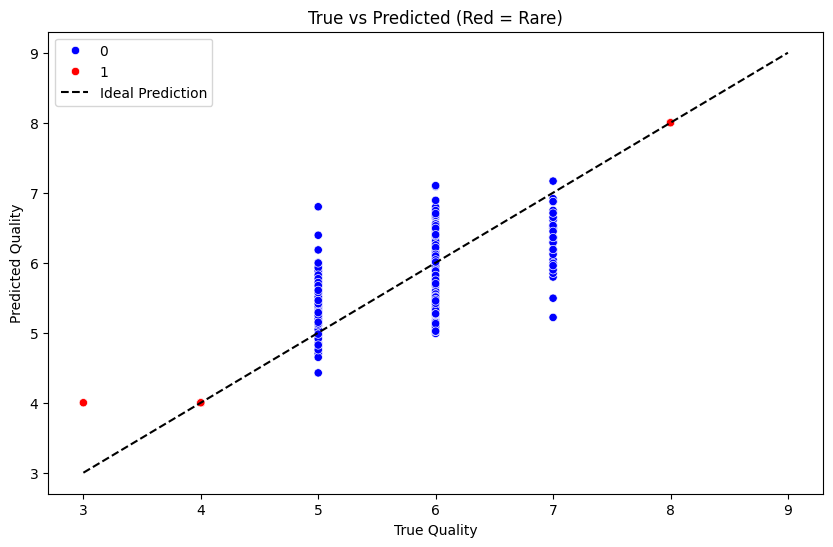

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, hue=y_rare_test, palette=['blue', 'red'])
plt.plot([3, 9], [3, 9], '--k', label='Ideal Prediction')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('True vs Predicted (Red = Rare)')
plt.legend()
plt.show()

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

def model(df):
  df = df
  X = df.drop('quality', axis=1)
  y = df['quality']
  plt.figure(figsize=(15, 6))

  plt.subplot(1, 2, 1)
  quality_dist = df['quality'].value_counts().sort_index()
  bars = plt.bar(quality_dist.index, quality_dist.values,
                color=plt.cm.viridis(np.linspace(0, 1, len(quality_dist))))
  plt.title('Распределение качества вин')
  plt.xlabel('Оценка качества')
  plt.ylabel('Количество образцов')
  plt.grid(axis='y', alpha=0.3)
  plt.figure(figsize=(12, 8))
  corr = df.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
              center=0, linewidths=0.5, cbar_kws={'shrink': 0.8})
  plt.title('Матрица корреляций признаков', pad=20)
  plt.xticks(rotation=45)
  plt.show()
  num_cols = df.select_dtypes(include=np.number).columns
  n_cols = len(num_cols)
  n_rows = (n_cols // 4) + (1 if n_cols % 4 else 0)
  layout = (n_rows, 4) if n_rows > 1 else (1, n_cols)
  df[num_cols].hist(bins=20, layout=layout, figsize=(18, 4*n_rows))
  plt.suptitle('Распределение числовых признаков', y=1.02)
  plt.tight_layout()
  plt.show()
  sns.pairplot(df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']],
              hue='quality', palette='viridis', plot_kws={'alpha': 0.6})
  plt.suptitle('Парные зависимости признаков', y=1.02)
  plt.show()
  plt.figure(figsize=(15, 8))
  sns.boxplot(data=df.drop('quality', axis=1), orient='h')
  plt.title('Распределение признаков с выбросами')
  plt.xlabel('Значение признаков')
  plt.grid(axis='x', alpha=0.3)
  plt.show()
  y_rare = y.apply(lambda x: 1 if x in [3,4,8,9] else 0)
  X_train, X_test, y_train, y_test, y_rare_train, y_rare_test = train_test_split(
      X, y, y_rare,
      test_size=0.2,
      random_state=42
  )

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)


  model = MLPRegressor(
      hidden_layer_sizes=(128, 64),  # 2 слоя: 128 и 64 нейрона
      activation='relu',             # ReLU активация
      solver='adam',                # Оптимизатор Adam (градиентный спуск)
      learning_rate_init=0.0003,    # Скорость обучения
      max_iter=300,                 # Эпохи
      early_stopping=True,          # Ранняя остановка
      validation_fraction=0.2,
      random_state=42
  )


  model.fit(X_train_scaled, y_train)


  y_test_pred = model.predict(X_test_scaled)


  rare_classes = [3,4,8,9]
  for i in range(len(y_test_pred)):
      if y_rare_test.iloc[i] == 1:
          closest = min(rare_classes, key=lambda x: abs(x - y_test_pred[i]))
          y_test_pred[i] = closest


  print(f"Test R² Score: {r2_score(y_test, y_test_pred):.3f}")
  print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")


  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=y_test, y=y_test_pred, hue=y_rare_test, palette=['blue', 'red'])
  plt.plot([3, 9], [3, 9], '--k', label='Ideal Prediction')
  plt.xlabel('True Quality')
  plt.ylabel('Predicted Quality')
  plt.title('True vs Predicted (Red = Rare)')
  plt.legend()
  plt.show()


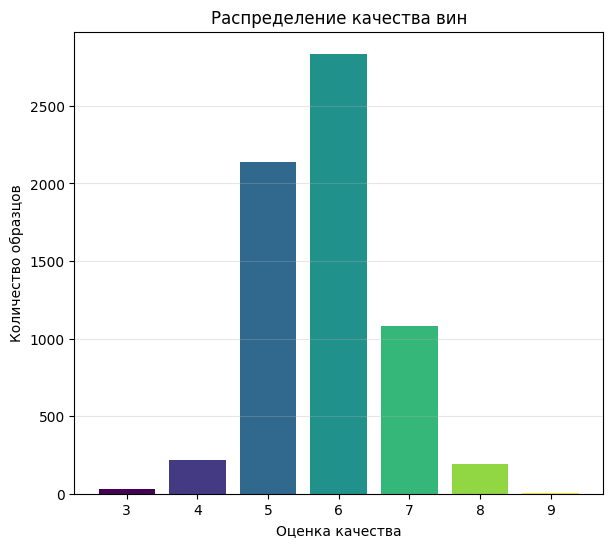

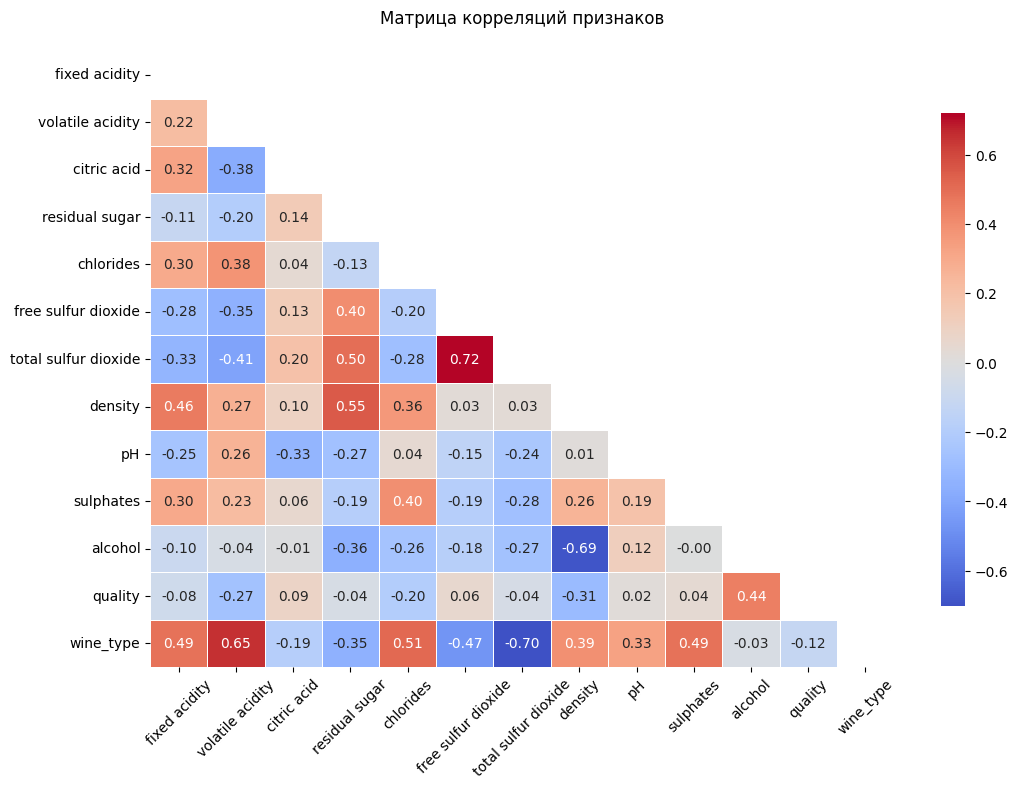

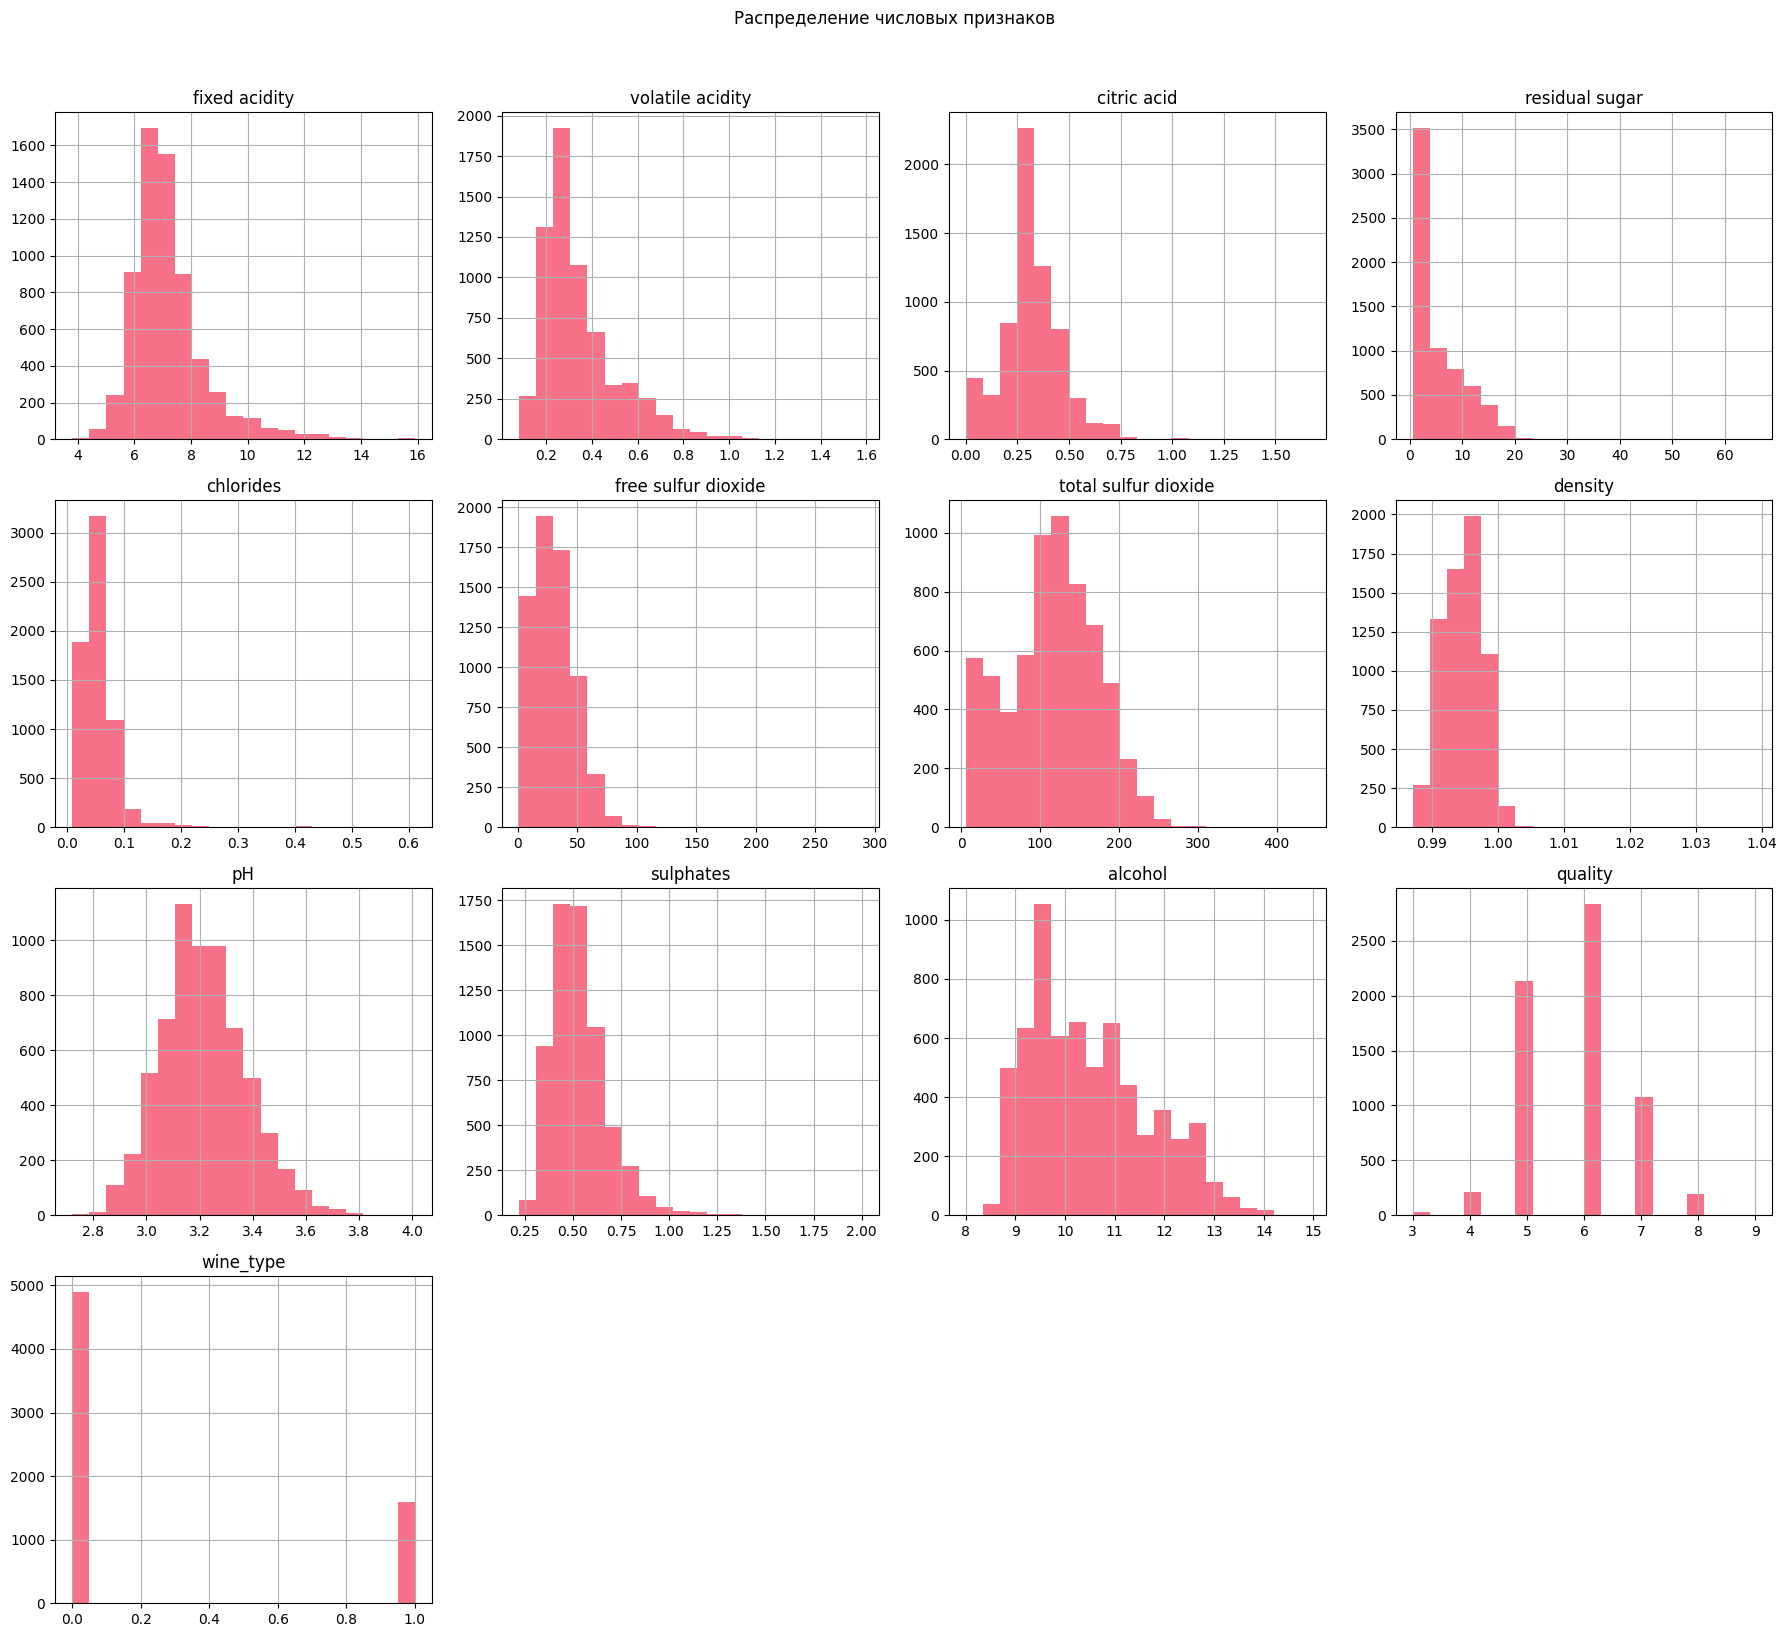

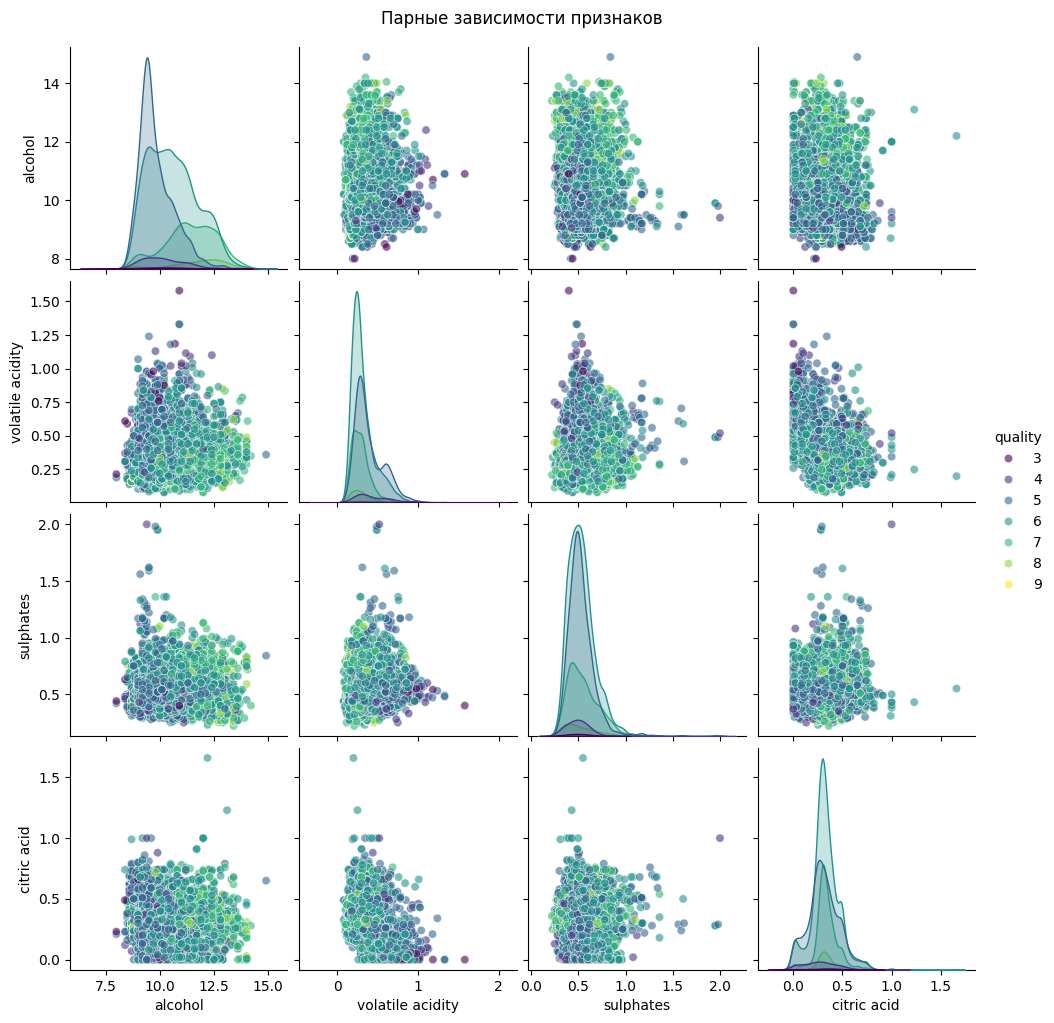

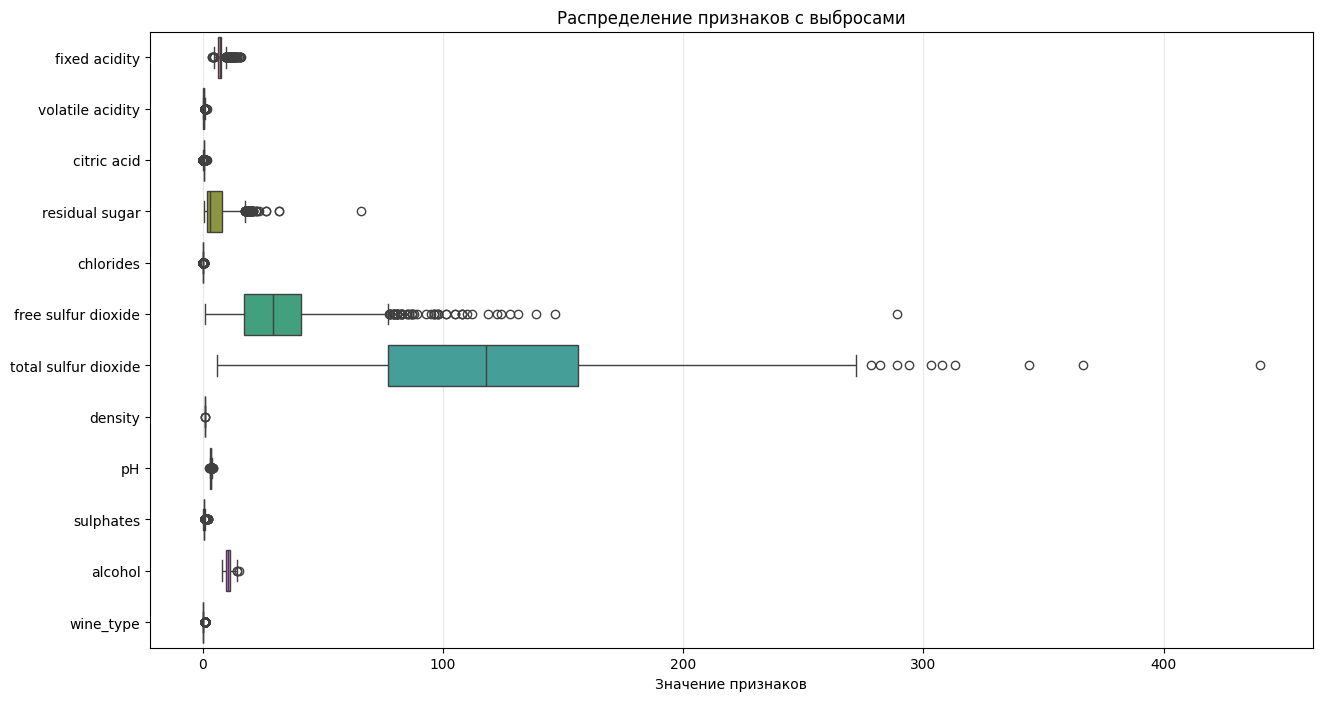

Test R² Score: 0.495
Test MAE: 0.448


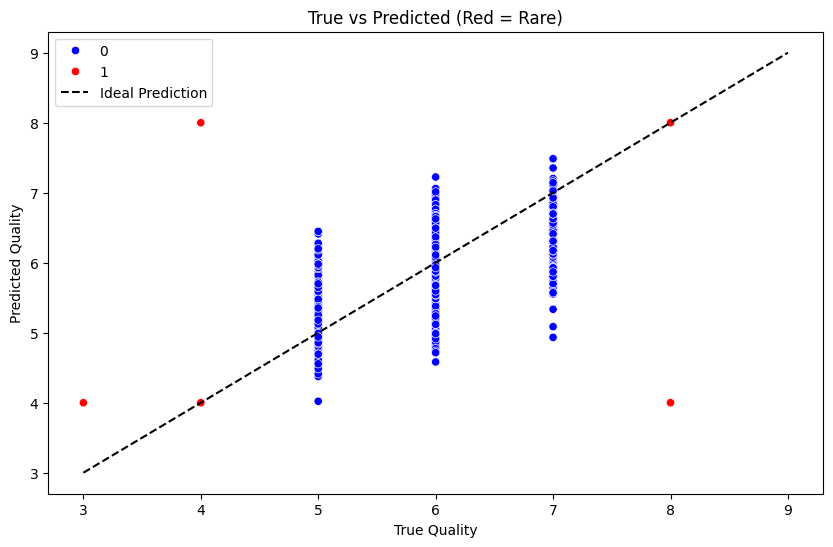

In [60]:
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_red = pd.read_csv('winequality-red.csv', sep=';')

df_white['wine_type'] = 0  # 0 = белое
df_red['wine_type'] = 1    # 1 = красное

df = pd.concat([df_white, df_red], axis=0)
model(df)

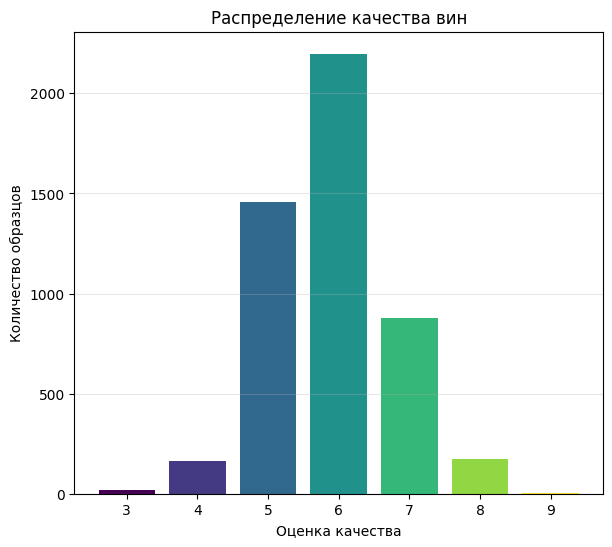

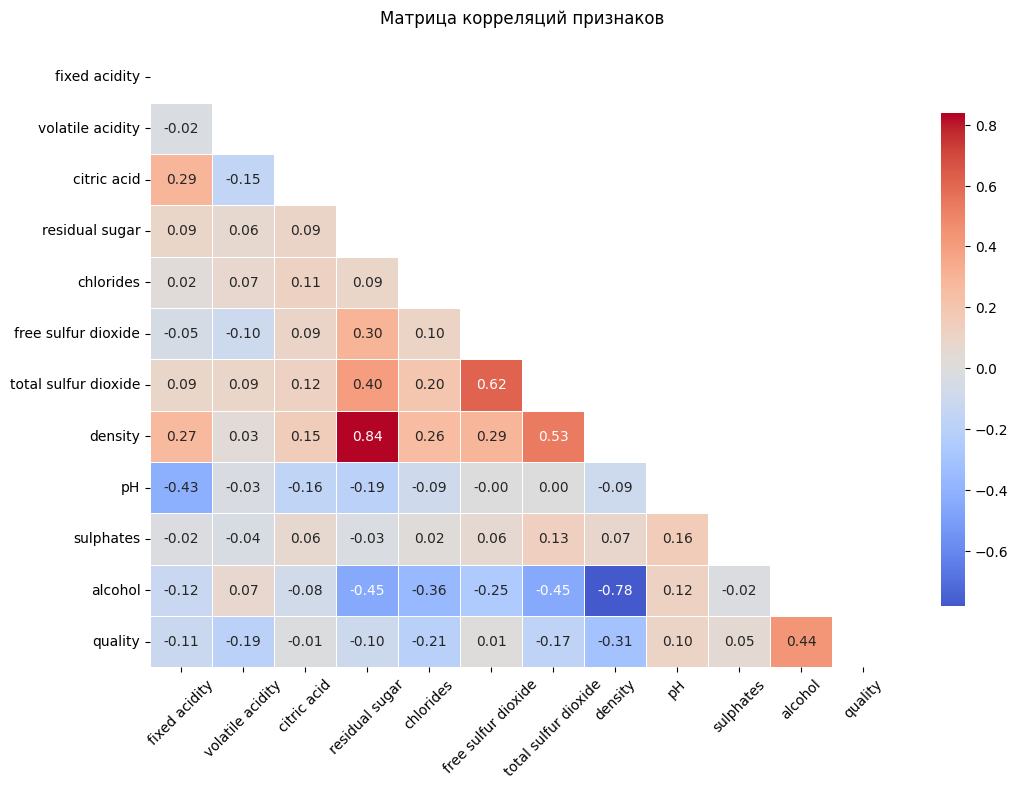

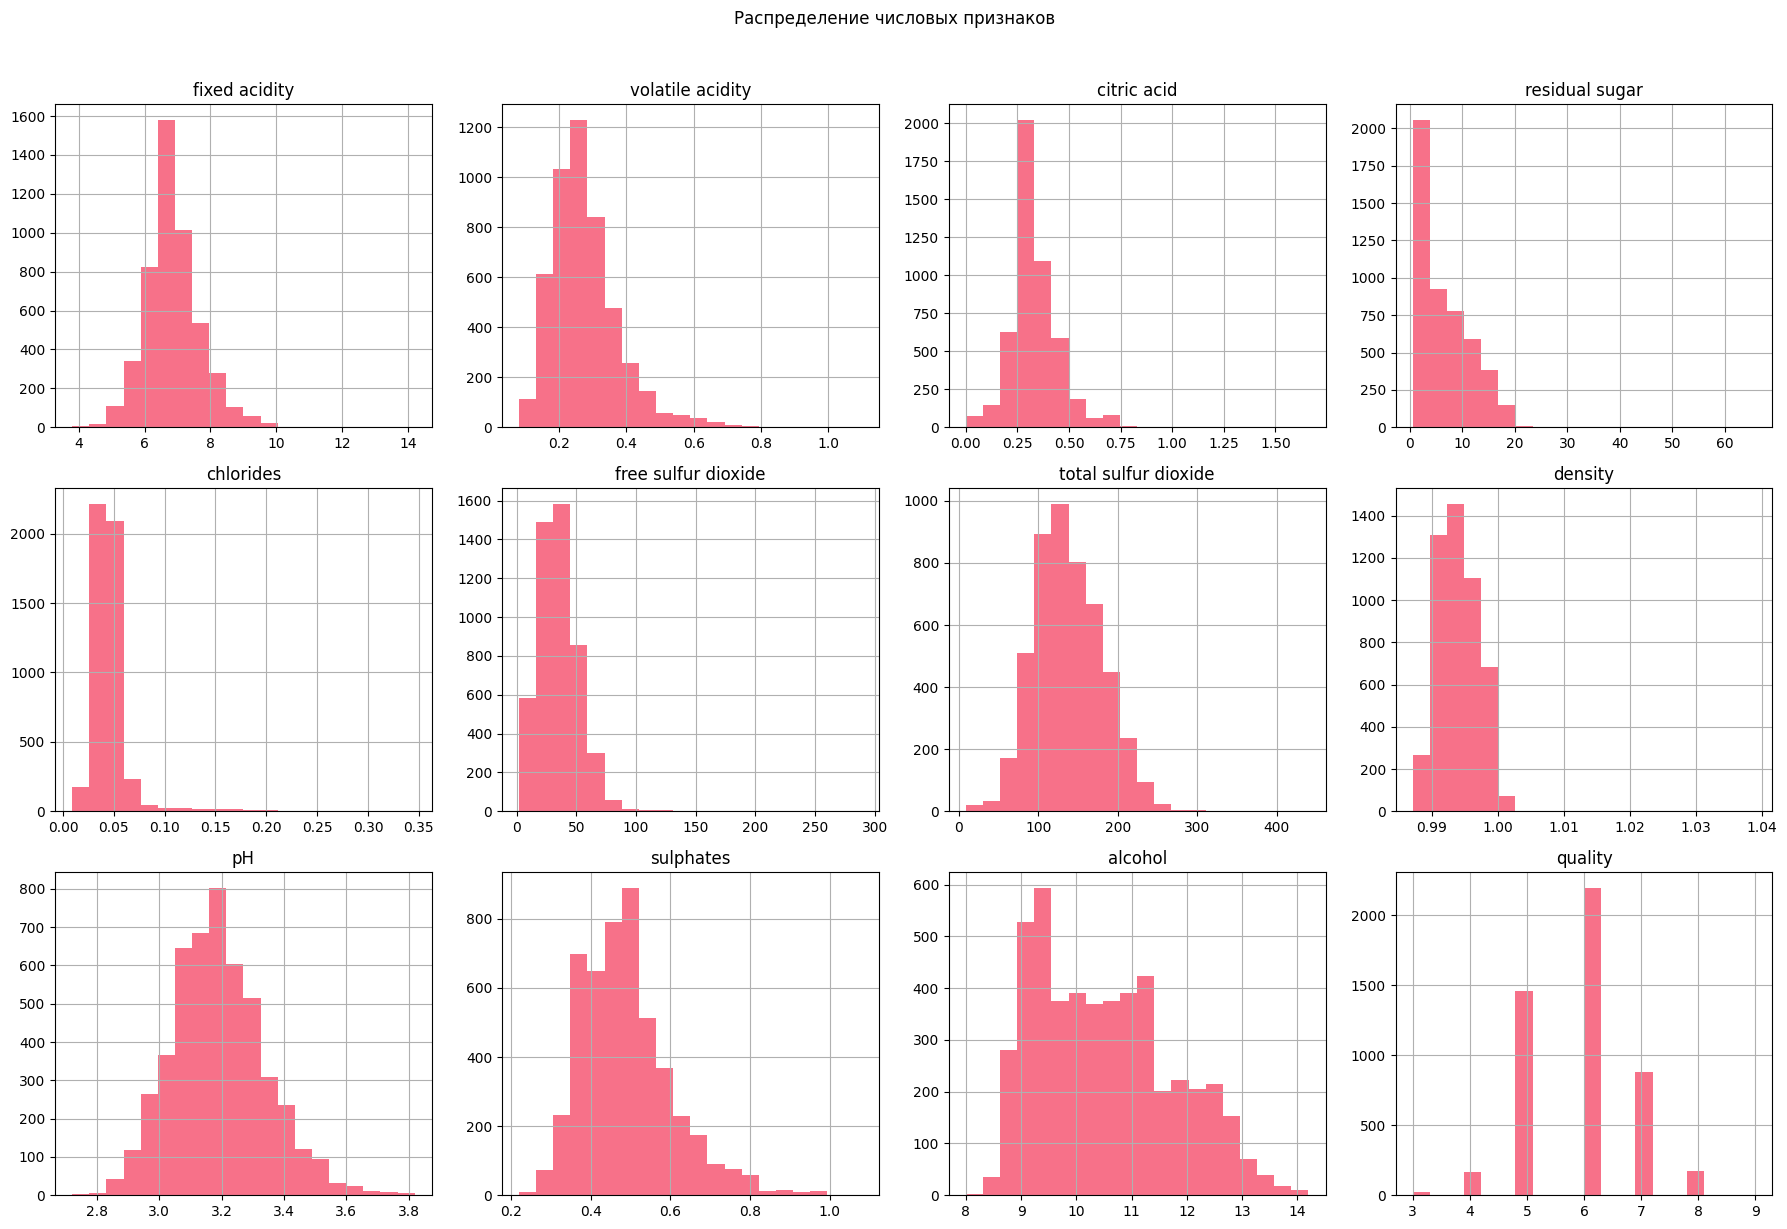

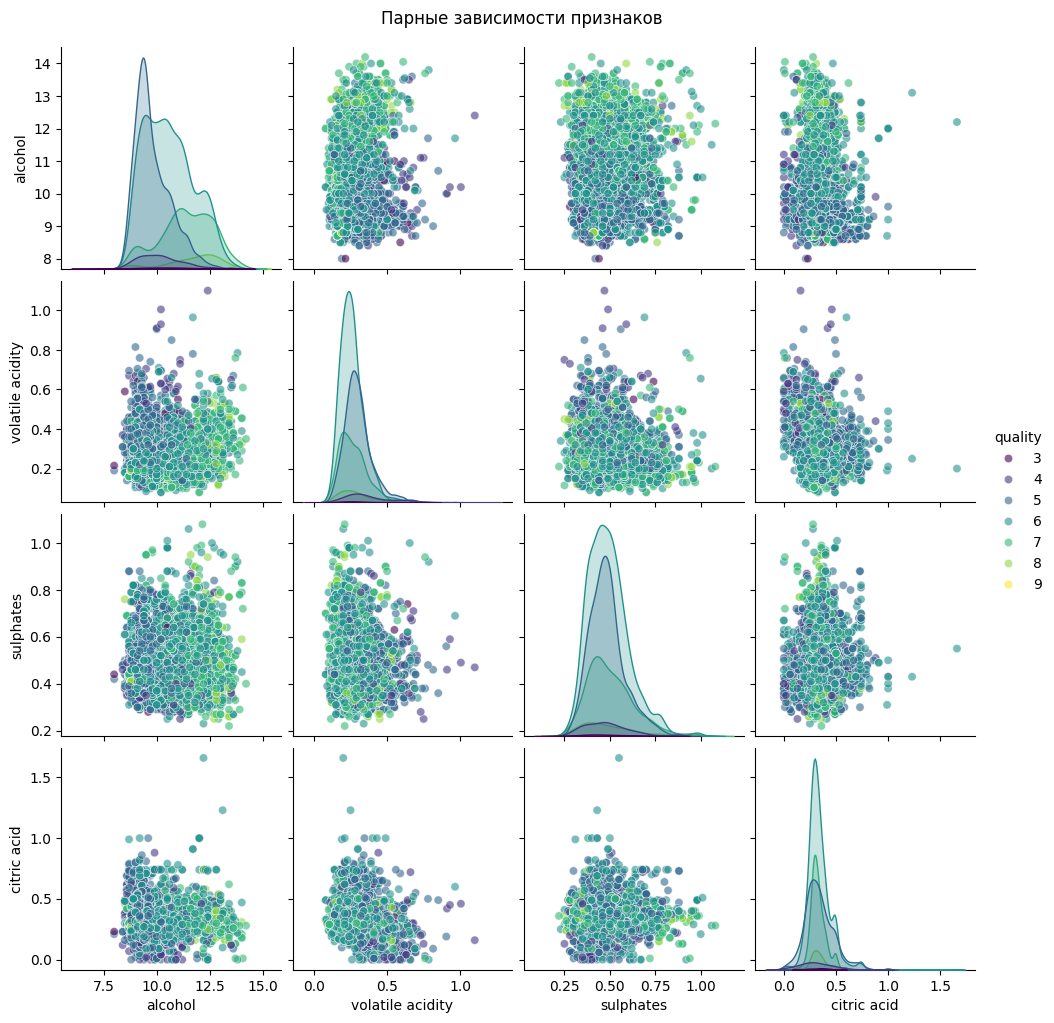

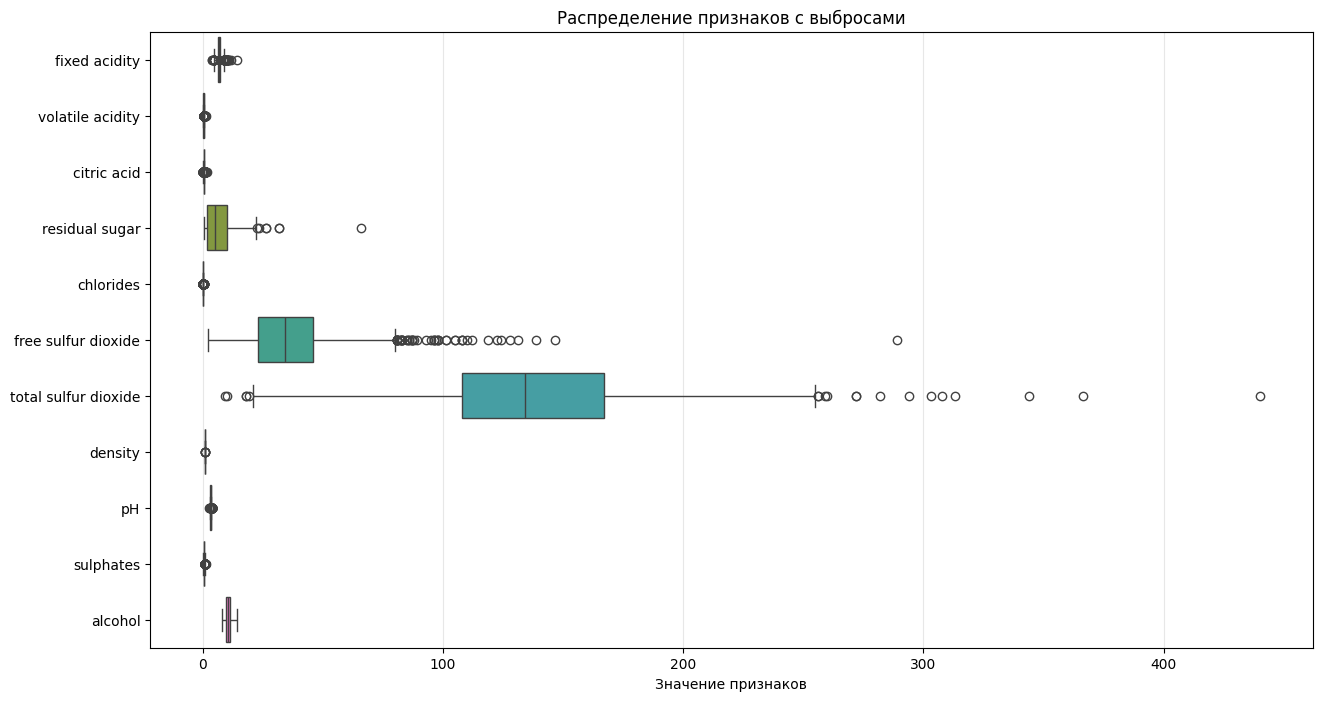

Test R² Score: 0.483
Test MAE: 0.463


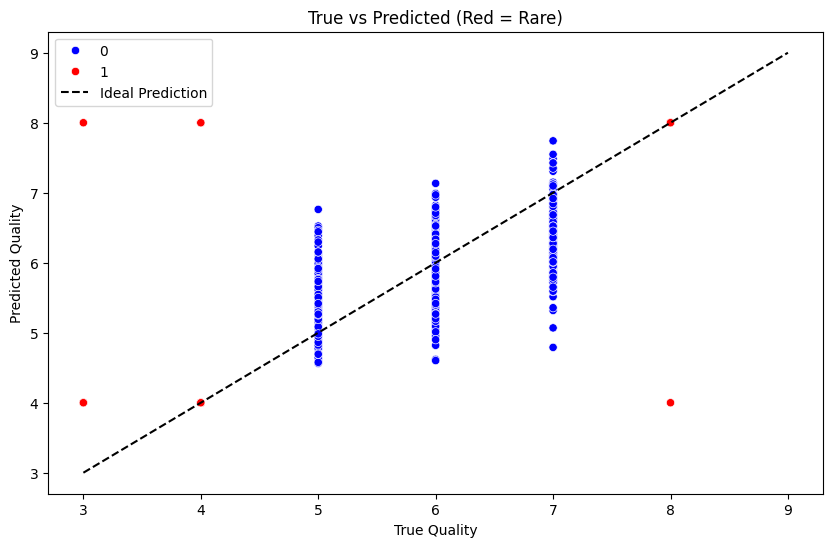

In [66]:
df_white = pd.read_csv('winequality-white.csv', sep=';')
model(df_white)

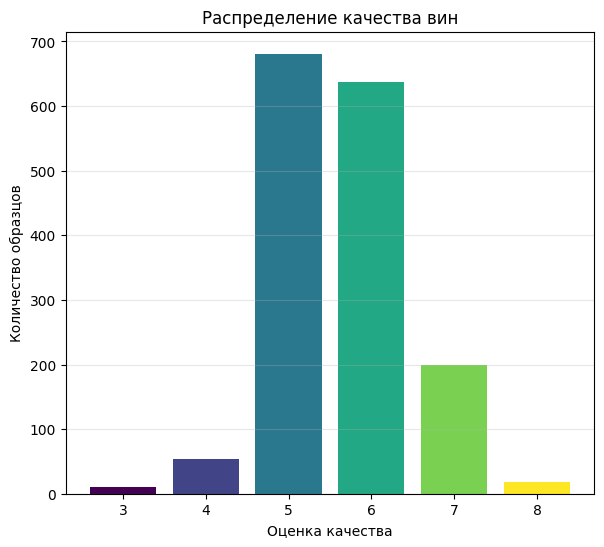

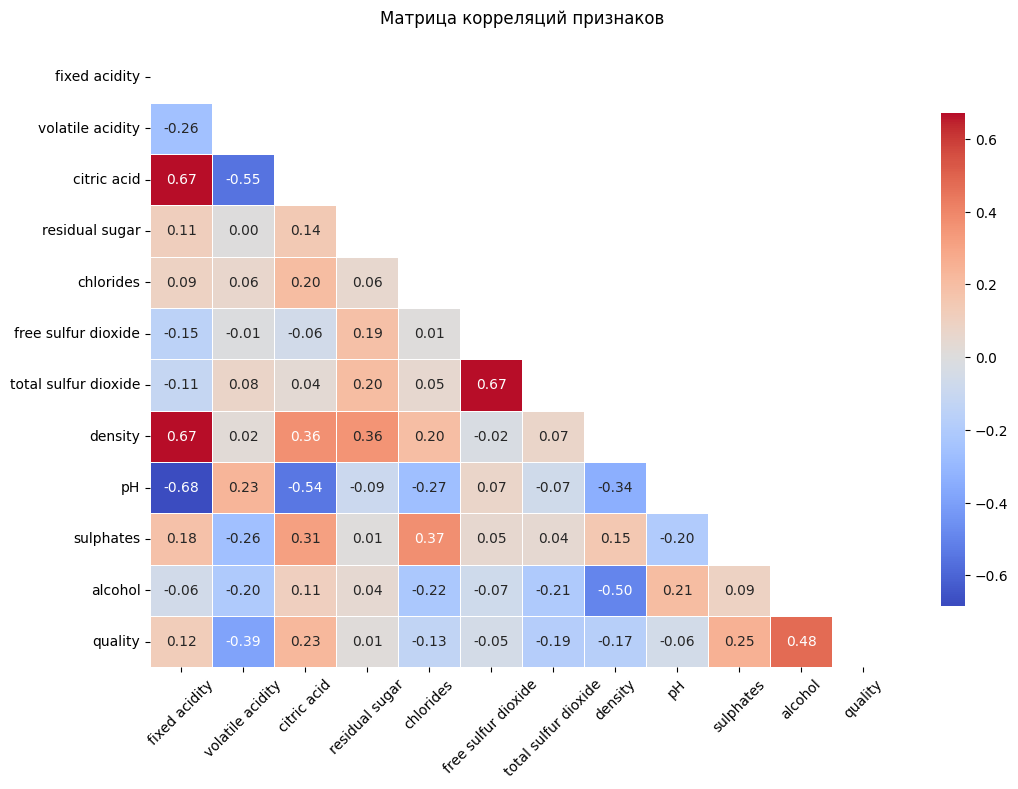

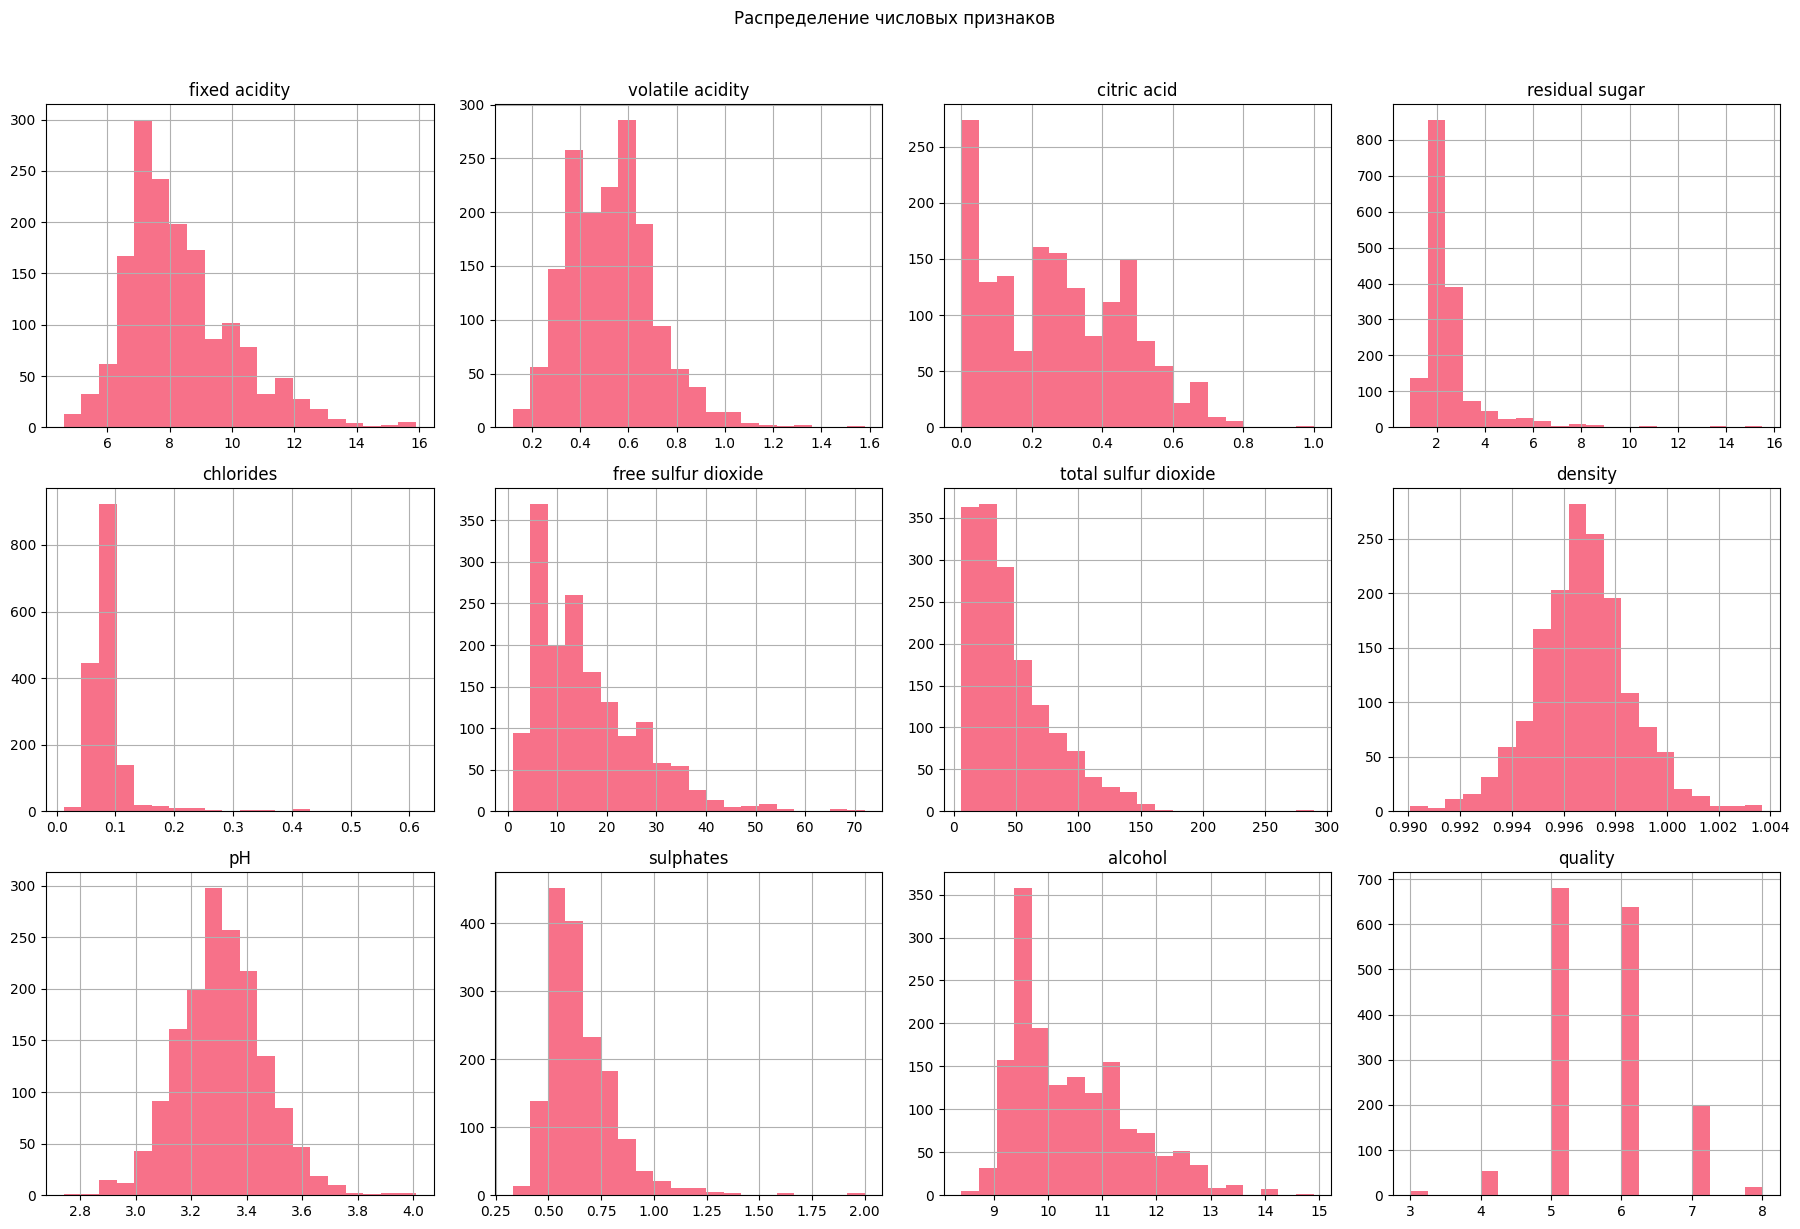

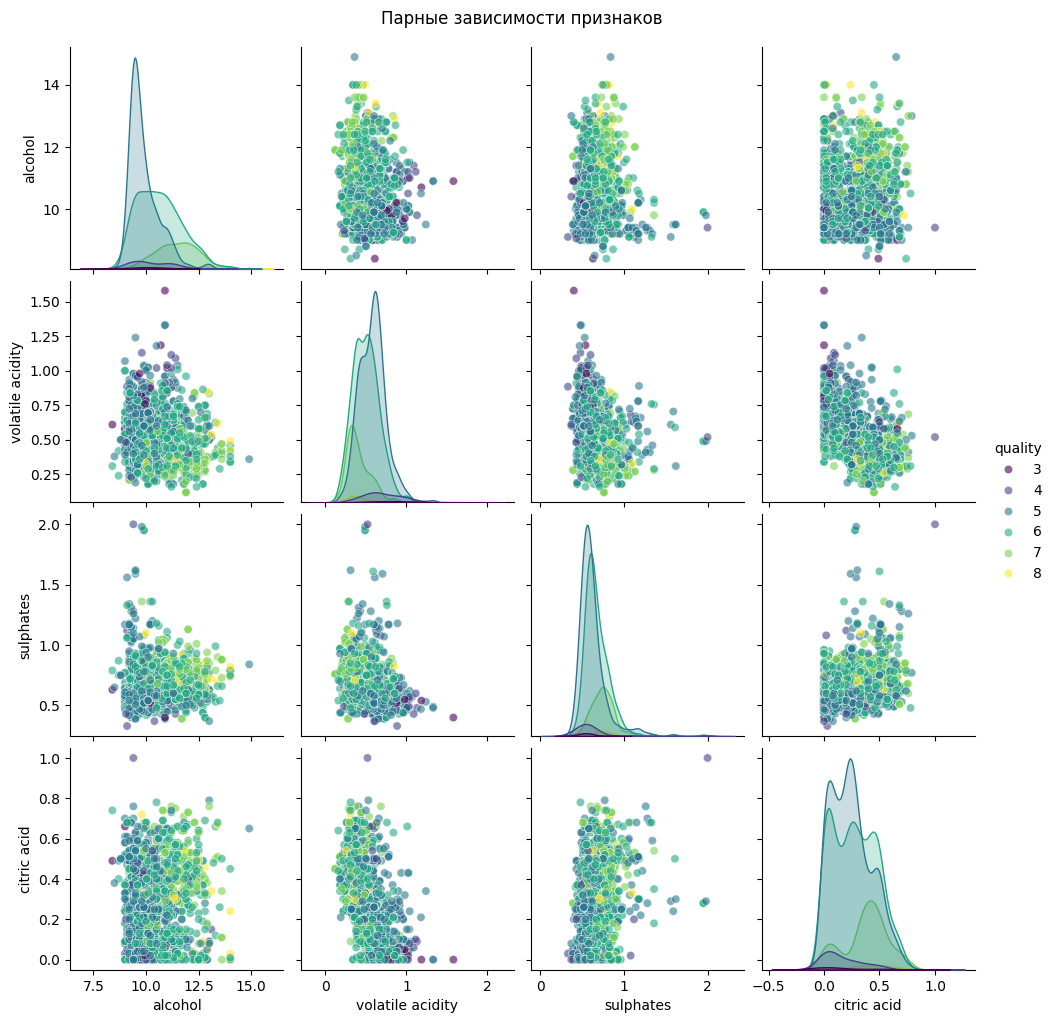

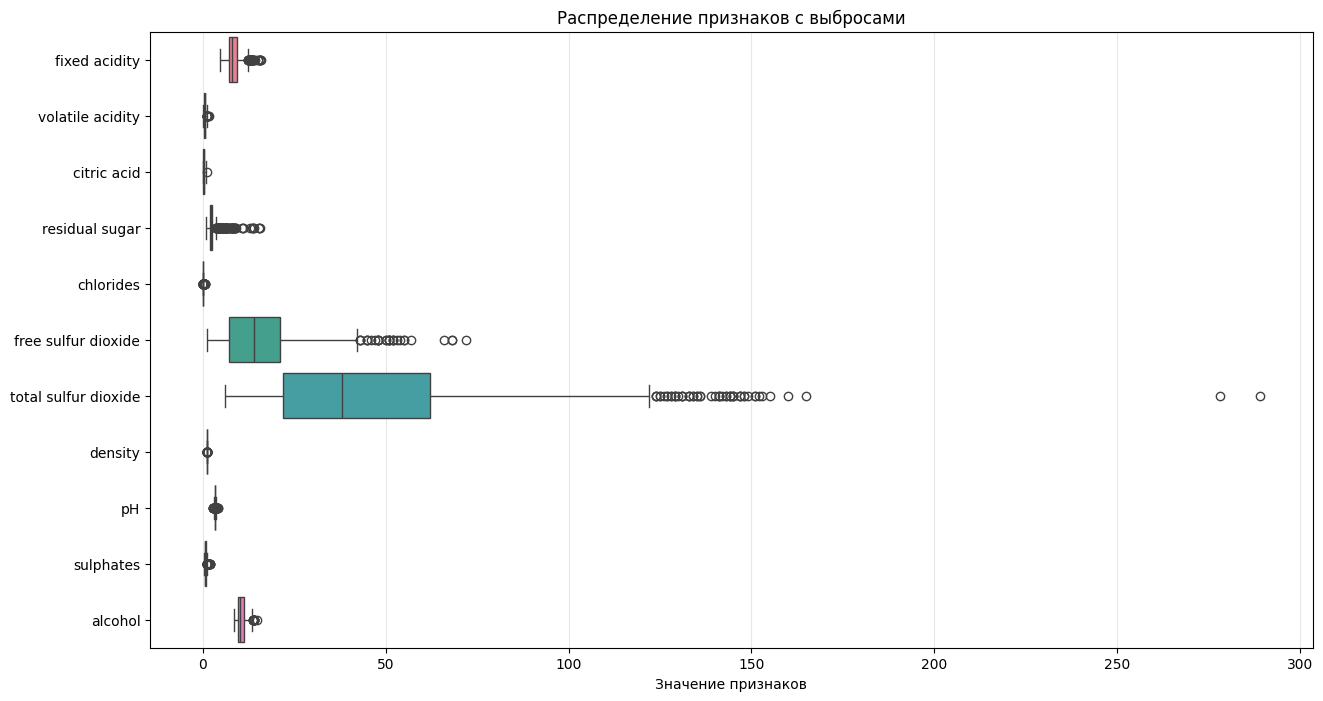

Test R² Score: 0.541
Test MAE: 0.440


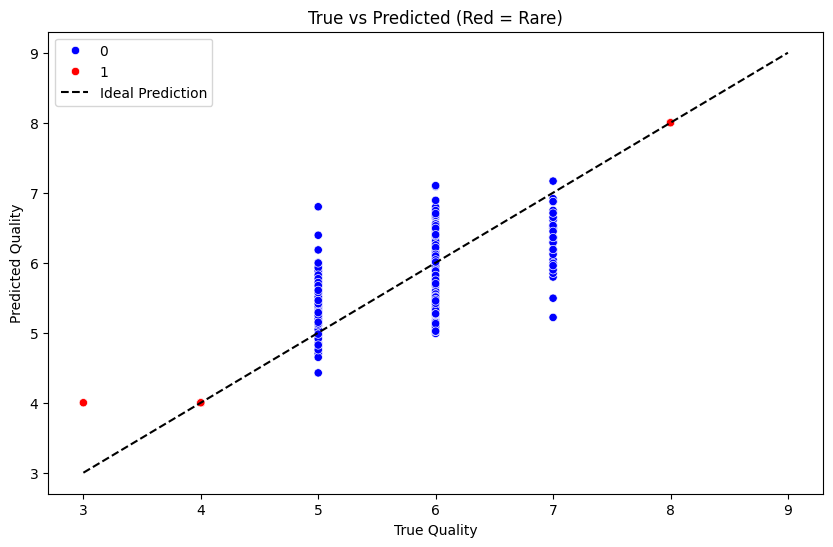

In [65]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
model(df_red)